We have already used the `minimize` function a few times:

In [1]:
from scipy.optimize import minimize

Now we pause to look at how it works, and how best to use it.

Let's go back to the problem from [finding lines](finding_lines):

In [2]:
# Our usual imports and configuration.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# Make plots look a little bit more fancy
plt.style.use('fivethirtyeight')

We used the [students ratings dataset]({{ site.baseurl
}}/data/rate_my_professors) dataset.  Download the data file via
[disciplines_SI.xlsx]({{ site.baseurl }}/data/disciplines_SI.xlsx).

We were looking for the best slope to relate the Easiness ratings to the
Overall Quality ratings.

Text(0, 0.5, 'Overall quality')

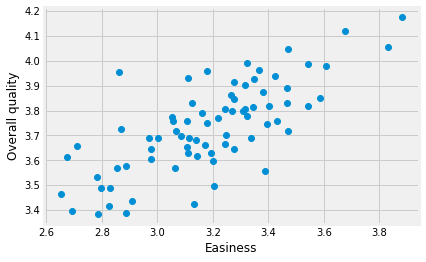

In [3]:
# Read the Excel format data file, get columns as arrays.
ratings = pd.read_excel('disciplines_SI.xlsx')
easiness = np.array(ratings['Easiness'])
quality = np.array(ratings['Overall Quality'])
plt.plot(easiness, quality, 'o')
plt.xlabel('Easiness')
plt.ylabel('Overall quality')

Here is the function we used to calculate sum of squared error, adapted for `minimize`.

In [4]:
def sos_error_for_minimize(c_s):
    # c_s has two elements, the intercept c and the slope s.
    c = c_s[0]
    s = c_s[1]
    predicted = c + easiness * s
    error = quality - predicted
    return np.sum(error ** 2)

We called `minimize` to find the best intercept and slope:

In [5]:
min_res = minimize(sos_error_for_minimize, [2.25, 0.47])
min_res

      fun: 1.0674471058042072
 hess_inv: array([[ 0.98777009, -0.30796915],
       [-0.30796915,  0.09667176]])
      jac: array([-1.49011612e-08,  1.49011612e-08])
  message: 'Optimization terminated successfully.'
     nfev: 20
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([2.11480098, 0.50886336])

## The result of `minimize`

Notice the thing that `minimize` returns is a special kind of thing that stores
information about the result:

In [6]:
# The value that comes back is a special thing to contain minimize results:
type(min_res)

scipy.optimize.optimize.OptimizeResult

Among the interesting thing that the results contain is the attribute `fun`.
This value is the final minimal value of the function we are trying to minimize
--- here the sum of squared error given an intercept and slope:

In [7]:
# The minimal value that `minimize` could find for our function.
min_res.fun

1.0674471058042072

We also have an array with the values for the intercept and slope that give the minimal value:

In [8]:
min_res.x

array([2.11480098, 0.50886336])

We confirm that `min_res.fun` is indeed the value we get from our function given the intercept, slope array in `min_res.x`:

In [9]:
sos_error_for_minimize(min_res.x)

1.0674471058042072

## The function to minimize

`sos_error_for_minimize` is a *function*:

In [10]:
type(sos_error_for_minimize)

function

We pass the function to `minimize` as an argument for it to use.  Try the [functions as values exercise]({{ site.baseurl }}/exercises/function_vals.zip) for more practice on the idea of using functions as values like this.

We can call the function we pass to `minimize` -- the *objective function* -- in the sense that our objective is to minimize this function.

How is `minimize` using our objective function?   Clearly `minimize` is
[calling]({{ site.baseurl }}/02/Calls) the function, but what arguments is it
sending?  How many times does it call the function?

To find out, we can stick something inside the objective function to tell us
each time it is called:

In [11]:
def ss_func_for_info(c_s):
    # Print the argument that minimize sent.
    print('Called with', c_s, 'of type', type(c_s))
    # The rest of the function is the same as the original above.
    # c_s has two elements, the intercept c and the slope s.
    c = c_s[0]
    s = c_s[1]
    predicted = c + easiness * s
    error = quality - predicted
    return np.sum(error ** 2)

The we call `minimize` with the new objective function:

In [12]:
min_res = minimize(ss_func_for_info, [2.25, 0.47])
min_res

Called with [2.25 0.47] of type <class 'numpy.ndarray'>
Called with [2.25000001 0.47      ] of type <class 'numpy.ndarray'>
Called with [2.25       0.47000001] of type <class 'numpy.ndarray'>
Called with [2.25 0.47] of type <class 'numpy.ndarray'>
Called with [ 1.92579402 -0.48655135] of type <class 'numpy.ndarray'>
Called with [ 1.92579402 -0.48655135] of type <class 'numpy.ndarray'>
Called with [ 1.92579404 -0.48655135] of type <class 'numpy.ndarray'>
Called with [ 1.92579402 -0.48655133] of type <class 'numpy.ndarray'>
Called with [2.24898338 0.46700051] of type <class 'numpy.ndarray'>
Called with [2.24898338 0.46700051] of type <class 'numpy.ndarray'>
Called with [2.24898339 0.46700051] of type <class 'numpy.ndarray'>
Called with [2.24898338 0.46700052] of type <class 'numpy.ndarray'>
Called with [2.12510786 0.50564777] of type <class 'numpy.ndarray'>
Called with [2.12510786 0.50564777] of type <class 'numpy.ndarray'>
Called with [2.12510788 0.50564777] of type <class 'numpy.ndarra

      fun: 1.0674471058042072
 hess_inv: array([[ 0.98777009, -0.30796915],
       [-0.30796915,  0.09667176]])
      jac: array([-1.49011612e-08,  1.49011612e-08])
  message: 'Optimization terminated successfully.'
     nfev: 20
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([2.11480098, 0.50886336])

This shows that:

* `minimize` calls our function multiple times, as it searches for the values
  of intercept and slope giving the minimum sum of squares;
* At each call, it passes a single argument that is an *array* containing the
  two values (intercept and slope).

Looking carefully, we see signs that `minimize` is trying small changes in the
slope or intercept, presumably to calculate the gradient --- as we saw in the
[optimization](optimization) page --- but that is not our concern here.

The values in the array that `minimize` passes are the *parameters* that
minimize is trying to optimize --- in our case, the intercept and slope.  Call
this the *parameter array*.

## Tricks for using minimize

### Unpacking

Near the top of our function, we have these two lines of code:

```
    c = c_s[0]
    s = c_s[1]
```

This is where we take set the intercept from the first value of the *parameter
array*, and the slope from the second.

It turns out there is neat and versatile way of doing this in Python, called
*unpacking*.   Consider this array:

In [13]:
c_s = np.array([2, 1])

We can *unpack* these two values into variables like this:

In [14]:
# Unpacking!
c, s = c_s

The right hand side contains two values (in an array).  The left hand side has
two variable names, separated by a comma.  Python take the two values from the right hand side, and puts them into the variables on the left:

In [15]:
print('c is', c)
print('s_is', s)

c is 2
s_is 1


The thing on the right hand side can be anything that is a sequence of two things.  For example, it can also be a list:

In [16]:
my_list = [6, 7]
my_var1, my_var2 = my_list
print('my_var1 is', my_var1)
print('my_var2 is', my_var2)

my_var1 is 6
my_var2 is 7


There can be three or four or any other number of variables on the left, as long as there is a matching number of elements in the thing on the right:

In [17]:
list2 = [10, 100, 10000]
w, x, y = list2
print('w is', w)
print('x is', x)
print('y is', y)

w is 10
x is 100
y is 10000


The number of elements must match the number of variables:

In [18]:
# Error - three variables on the left, two elements on the right.
p, q, r = [1, 2]

ValueError: not enough values to unpack (expected 3, got 2)

### Using unpacking in minimize

Unpacking has two good uses with `minimize`.  The first is that we can make our function to minimize a little neater:

In [19]:
def ss_with_unpacking(c_s):
    # c_s has two elements, the intercept c and the slope s.
    # Use unpacking!
    c, s = c_s
    predicted = c + easiness * s
    error = quality - predicted
    return np.sum(error ** 2)

The second is, we can use unpacking to --- er --- unpack the best fit intercept and slope from the result of `minimize`.  Remember, `minimize` returns a result value, that includes an array `x` with the parameters minimizing our function:

In [20]:
m_r = minimize(ss_with_unpacking, [2.25, 0.47])
m_r

      fun: 1.0674471058042072
 hess_inv: array([[ 0.98777009, -0.30796915],
       [-0.30796915,  0.09667176]])
      jac: array([-1.49011612e-08,  1.49011612e-08])
  message: 'Optimization terminated successfully.'
     nfev: 20
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([2.11480098, 0.50886336])

We can get the best-fit intercept and slope values by unpacking:

In [21]:
best_c, best_s = m_r.x
print(best_c)
print(best_s)

2.114800980276273
0.5088633619994262


We often end up doing this all in one shot:

In [22]:
best_c, best_s = minimize(ss_with_unpacking, [2.25, 0.47]).x
print(best_c)
print(best_s)

2.114800980276273
0.5088633619994262


### Other arguments to our function

Inspect the help for `minimize` with `minimize?`.   You will notice that there
is an argument we can pass to `minimize` called `args`.  These are "Extra
arguments passed to the objective function".  In fact, this is very useful to make our objective function more general.  First we try this silly use of `args` where we pass a couple of useless numbers to our objective function:

In [23]:
def ss_with_extra_numbers(c_s, p, q):
    # An objective function with some useless extra arguments.
    print('c_s', c_s, 'p', p, 'q', q)
    c, s = c_s
    predicted = c + easiness * s
    error = quality - predicted
    return np.sum(error ** 2)

Now we tell `minimize` to pass some value for `p` and `q` for each call to the objective function:

In [24]:
# args has two values, one that becomes "p" and the other that becomes "q".
minimize(ss_with_extra_numbers, [2.25, 0.47], args=(99, 101))

c_s [2.25 0.47] p 99 q 101
c_s [2.25000001 0.47      ] p 99 q 101
c_s [2.25       0.47000001] p 99 q 101
c_s [2.25 0.47] p 99 q 101
c_s [ 1.92579402 -0.48655135] p 99 q 101
c_s [ 1.92579402 -0.48655135] p 99 q 101
c_s [ 1.92579404 -0.48655135] p 99 q 101
c_s [ 1.92579402 -0.48655133] p 99 q 101
c_s [2.24898338 0.46700051] p 99 q 101
c_s [2.24898338 0.46700051] p 99 q 101
c_s [2.24898339 0.46700051] p 99 q 101
c_s [2.24898338 0.46700052] p 99 q 101
c_s [2.12510786 0.50564777] p 99 q 101
c_s [2.12510786 0.50564777] p 99 q 101
c_s [2.12510788 0.50564777] p 99 q 101
c_s [2.12510786 0.50564779] p 99 q 101
c_s [2.11480098 0.50886336] p 99 q 101
c_s [2.11480098 0.50886336] p 99 q 101
c_s [2.114801   0.50886336] p 99 q 101
c_s [2.11480098 0.50886338] p 99 q 101


      fun: 1.0674471058042072
 hess_inv: array([[ 0.98777009, -0.30796915],
       [-0.30796915,  0.09667176]])
      jac: array([-1.49011612e-08,  1.49011612e-08])
  message: 'Optimization terminated successfully.'
     nfev: 20
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([2.11480098, 0.50886336])

Notice that, each time `minimize` calls `ss_with_extra_numbers` it passes the first value of `args` as the second argument to the function (`p`) and the second value of `args` as the third argument to the function (`q`).

This isn't very exciting so far, but now we can solve a problem that may not have been obvious --- our objective function has been using `easiness` and `quality` from the global namespace.   This means that each time we want to find a least-squares intercept and slope for a pair of arrays, we have to write a new objective function, using different values from the global namespace.

For example, we might want to find the best slope relating `easiness` to the ratings for "Clarity".  We have to write a whole new function to do that, where we replace `quality` with `clarity`:

In [25]:
clarity = np.array(ratings['Clarity'])

In [26]:
def ss_clarity(c_s):
    c, s = c_s
    predicted = c + easiness * s
    error = clarity - predicted
    return np.sum(error ** 2)

In [27]:
minimize(ss_clarity, [2.25, 0.47])

      fun: 1.1958591481237515
 hess_inv: array([[ 0.98777016, -0.30796917],
       [-0.30796917,  0.09667177]])
      jac: array([-1.49011612e-08, -1.49011612e-08])
  message: 'Optimization terminated successfully.'
     nfev: 20
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([1.94388533, 0.55407123])

That is annoying, because we're doing exactly the same work in our objective function, just with different variables.

Aha - we can use `args` to pass the `x` and `y` values for our function to work on:

In [28]:
def ss_any_line(c_s, x_values, y_values):
    c, s = c_s
    predicted = c + x_values * s
    error = y_values - predicted
    return np.sum(error ** 2)

Now we can use the same objective function for any pair of `x` and `y` values:

In [29]:
minimize(ss_any_line, [2.25, 0.47], args=(easiness, quality))

      fun: 1.0674471058042072
 hess_inv: array([[ 0.98777009, -0.30796915],
       [-0.30796915,  0.09667176]])
      jac: array([-1.49011612e-08,  1.49011612e-08])
  message: 'Optimization terminated successfully.'
     nfev: 20
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([2.11480098, 0.50886336])

In [30]:
minimize(ss_any_line, [2.25, 0.47], args=(easiness, clarity))

      fun: 1.1958591481237515
 hess_inv: array([[ 0.98777016, -0.30796917],
       [-0.30796917,  0.09667177]])
      jac: array([-1.49011612e-08, -1.49011612e-08])
  message: 'Optimization terminated successfully.'
     nfev: 20
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([1.94388533, 0.55407123])